# Task 2: Text Processing 
#### All code used in this document has been taken from Python documentation, previous modules and those taught in the image and text processing for data science module  (Van and Drake, 1995). 

In [25]:
# Loading in required libraries 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy
import nltk
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer, WordNetLemmatizer 
nltk. download ('punkt') # Avoids errors 
nltk. download ('omw-1.4') # Avoids errors
nltk. download( 'wordnet') # English dictionary lexical database 
nltk. download ("stopwords") # Stopwords list (english) 
nltk. download ('averaged perceptron tagger') # Pre-trained model 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computing\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Computing\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Computing\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Computing\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading averaged perceptron tagger: Package
[nltk_data]     'averaged perceptron tagger' not found in index


## Reading in the data

In [26]:
# Set the folder path where the BBC dataset is stored
folder_path = r"C:\Users\Computing\Downloads\archive\bbc"

# List all the topics in the specified folder
topics = os.listdir(folder_path)

# Initialise an empty list to store document data
documents = []

# Iterate through each topic folder
for topic in topics:
    # Get the full path of the current topic folder
    topic_dir = os.path.join(folder_path, topic)
    
    # Iterate through each file in the topic folder
    for file in os.listdir(topic_dir):
        # Open each file in read mode, specifying the encoding as 'latin-1'
        with open(os.path.join(topic_dir, file), 'r', encoding='latin-1') as file:
            # Read the contents of the file
            text = file.read()
            
            # Append the document data to the list, including the original text and topic label
            documents.append({'original_text': text, 'topic_labels': topic})

# Create a DataFrame from the list of document data
data = pd.DataFrame(documents)

In [27]:
print("Category of the First Document:", data.iloc[0]['topic_labels'])  # Print the category of the first document
print("Length of the Text:", len(data.iloc[0]['original_text']))  # Print the length of the text in the first document
print("Full Text of the First Document:")
print(data.iloc[0]['original_text'])  # Print the full text of the first document

Category of the First Document: business
Length of the Text: 2560
Full Text of the First Document:
Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscrib

In [28]:
# Count of each unique category
category_counts = data['topic_labels'].value_counts()
print("Category Counts:")
print(category_counts)

Category Counts:
topic_labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


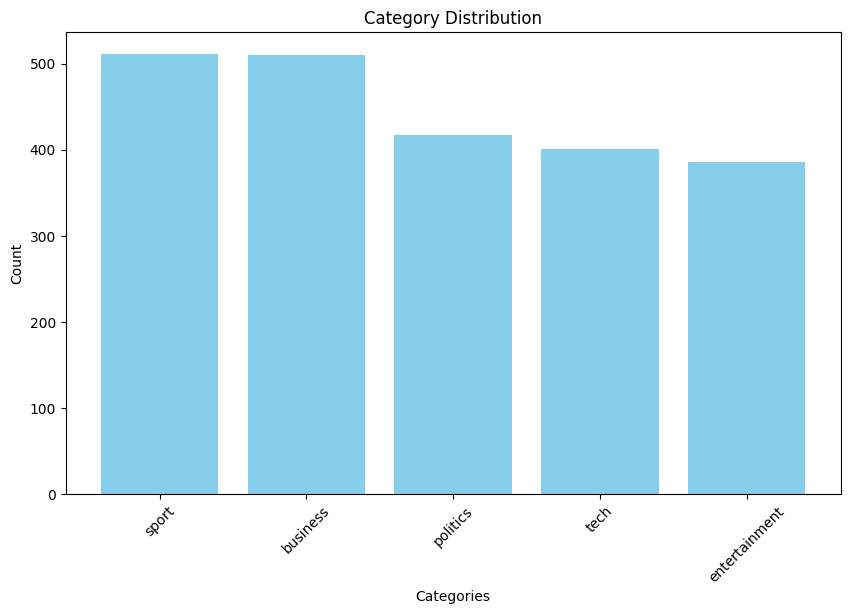

In [29]:
# Count of each unique category
category_counts = data['topic_labels'].value_counts()

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# No class is overly represented or too extreme, therefore there is no need to balance the dataset. 

## Pre-processing

In [30]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialise WordNetLemmatizer for lemmatisation
lemmatizer = WordNetLemmatizer()

# Initialise WordPunctTokenizer for tokenisation
wpt = nltk.WordPunctTokenizer()

# Defining stopwords
stop_words = set(stopwords.words('english'))

def preprocess_document(doc):
    # Lowercase the text
    doc = doc.lower()
    
    # Remove special characters, non-alphabetic characters, and extra whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    doc = doc.strip()
    
    # Tokenise the text
    tokens = wpt.tokenize(doc)
    
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatise tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Re-create document from lemmatised tokens
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

# Applying preprocessing to the original text column
data['preprocessed_text'] = data['original_text'].apply(preprocess_document)

In [31]:
print("Category of the First Document:", data.iloc[0]['topic_labels'])  # Print the category of the first document
print("Length of the Text:", len(data.iloc[0]['preprocessed_text']))  # Print the length of the preprocessed text in the first document
print("Preprocessed Text of the First Document:")
print(data.iloc[0]['preprocessed_text'])  # Print the preprocessed text of the first document

Category of the First Document: business
Length of the Text: 1731
Preprocessed Text of the First Document:
ad sale boost time warner profit quarterly profit u medium giant timewarner jumped bn three month december yearearlier firm one biggest investor google benefited sale highspeed internet connection higher advert sale timewarner said fourth quarter sale rose bn bn profit buoyed oneoff gain offset profit dip warner bros le user aol time warner said friday owns searchengine google internet business aol mixed fortune lost subscriber fourth quarter profit lower preceding three quarter however company said aols underlying profit exceptional item rose back stronger internet advertising revenue hope increase subscriber offering online service free timewarner internet customer try sign aols existing customer highspeed broadband timewarner also restate result following probe u security exchange commission sec close concluding time warner fourth quarter profit slightly better analyst expectat

In [32]:
features = data['preprocessed_text']
labels = data['topic_labels']

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

print((features_train.shape, labels_train.shape), (features_test.shape, labels_test.shape))

((1557,), (1557,)) ((668,), (668,))


In [33]:
from sklearn.decomposition import LatentDirichletAllocation

# Define a function for topic labelling
def label_topics(features_train, n_topics=5):
    # InitialiSe LDA model
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    
    # Fit LDA model on the preprocessed text data
    lda_output = lda_model.fit_transform(features_train)
    
    # Function to get the topic for each document
    dominant_topic = np.argmax(lda_output, axis=1)
    
    # Assign labels based on each topic
    topic_labels = {
        0: 'business',
        1: 'entertainment',
        2: 'politics',
        3: 'sport',
        4: 'tech'
    }
    
    # Map topics to labels
    labels_lda = [topic_labels[topic] for topic in dominant_topic]
    
    return labels_lda

## Feature Extraction

### BoW

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# Bag of words
# CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform on the training data
features_train_bow = count_vectorizer.fit_transform(features_train)

# Transform the test data
features_test_bow = count_vectorizer.transform(features_test)

# Call the function to perform topic labeling on the training data
labels_train_lda = label_topics(features_train_bow)

### TF-DIF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on the training data
features_train_tfidf = tfidf_vectorizer.fit_transform(features_train)

# Transform the test data
features_test_tfidf = tfidf_vectorizer.transform(features_test)

# Call the function to perform topic labeling on the training data
labels_train_lda = label_topics(features_train_tfidf)

## Machine Learning - Support Vector Machine (TF-IDF)

Classification Report:
               precision    recall  f1-score   support

     business       0.95      0.97      0.96       165
entertainment       0.99      0.98      0.99       118
     politics       0.97      0.96      0.96       120
        sport       0.99      0.99      0.99       140
         tech       0.98      0.97      0.98       125

     accuracy                           0.97       668
    macro avg       0.98      0.97      0.98       668
 weighted avg       0.97      0.97      0.97       668

Test Accuracy: 0.9745508982035929


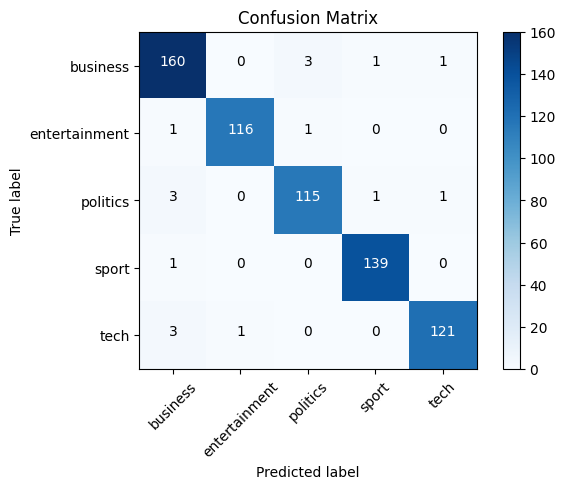

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Initialise SVM classifier
svm_classifier = SVC()

# Train SVM classifier
svm_classifier.fit(features_train_tfidf, labels_train)

# Test SVM classifier
predictions_tfidf = svm_classifier.predict(features_test_tfidf)

# Print classification report
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
print("Classification Report:")
print(classification_report(labels_test, predictions_tfidf, target_names=target_names))

# Calculate accuracy
accuracy_tfidf = accuracy_score(labels_test, predictions_tfidf)
print("Test Accuracy:", accuracy_tfidf)

# Generate confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions_tfidf)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Support Vector Machine (BOW)

Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.95      0.96       165
entertainment       0.98      0.96      0.97       118
     politics       0.95      0.97      0.96       120
        sport       0.99      1.00      1.00       140
         tech       0.95      0.97      0.96       125

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668

Test Accuracy: 0.968562874251497


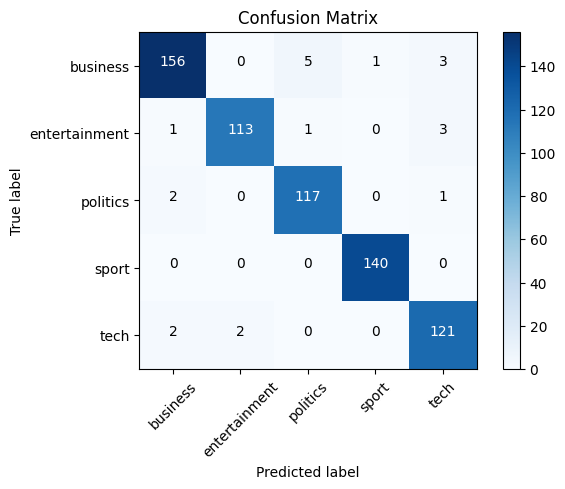

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Initialise SVM classifier
svm_classifier = SVC()

# Train SVM classifier
svm_classifier.fit(features_train_bow, labels_train)

# Test SVM classifier
predictions_bow = svm_classifier.predict(features_test_bow)

# Print classification report
target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
print("Classification Report:")
print(classification_report(labels_test, predictions_bow, target_names=target_names))

# Calculate accuracy
accuracy_bow = accuracy_score(labels_test, predictions_bow)
print("Test Accuracy:", accuracy_bow)

# Generate confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions_bow)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Comparisons

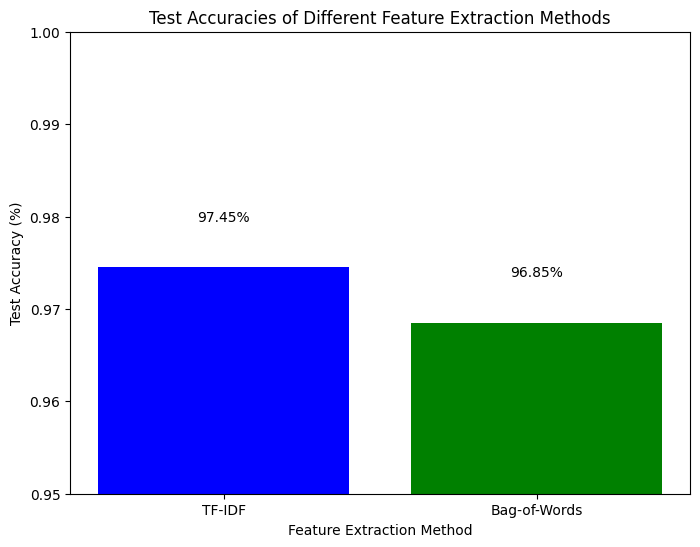

In [39]:
# Test accuracy, plotting bar charts.
accuracies = [0.9745, 0.9685]
models = ['TF-IDF', 'Bag-of-Words']

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Test Accuracies of Different Feature Extraction Methods')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Test Accuracy (%)')
plt.ylim(0.95, 1.0) 

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.005, 
             f'{accuracy * 100:.2f}%', 
             ha='center', 
             color='black', 
             fontsize=10)

plt.show()
